## Legendary Pokemon prediction

In this blog we will analyse the pokemon dataset and predict whether the pokemon is legendary or not based on the features provided. We will discuss everything from the scratch we will go from csv to model building with line by line explanation of code. Let's get started.

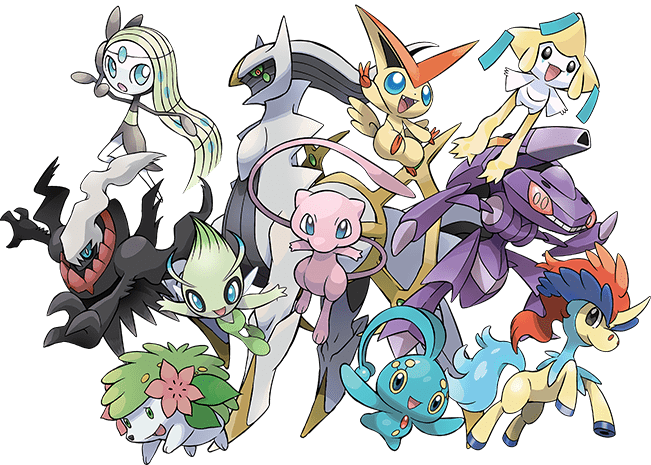

### Takeaways from this blog
* Understand how to analyse the dataset before carrying forward to model building phase.
* Getting the insights from the data.
* Visualization of dataset.
* Model building
* Saving model.

### About the dataset
This dataset have 721 unique values i.e. it has feaures of 721 unique pokemons, for further details visit this link.

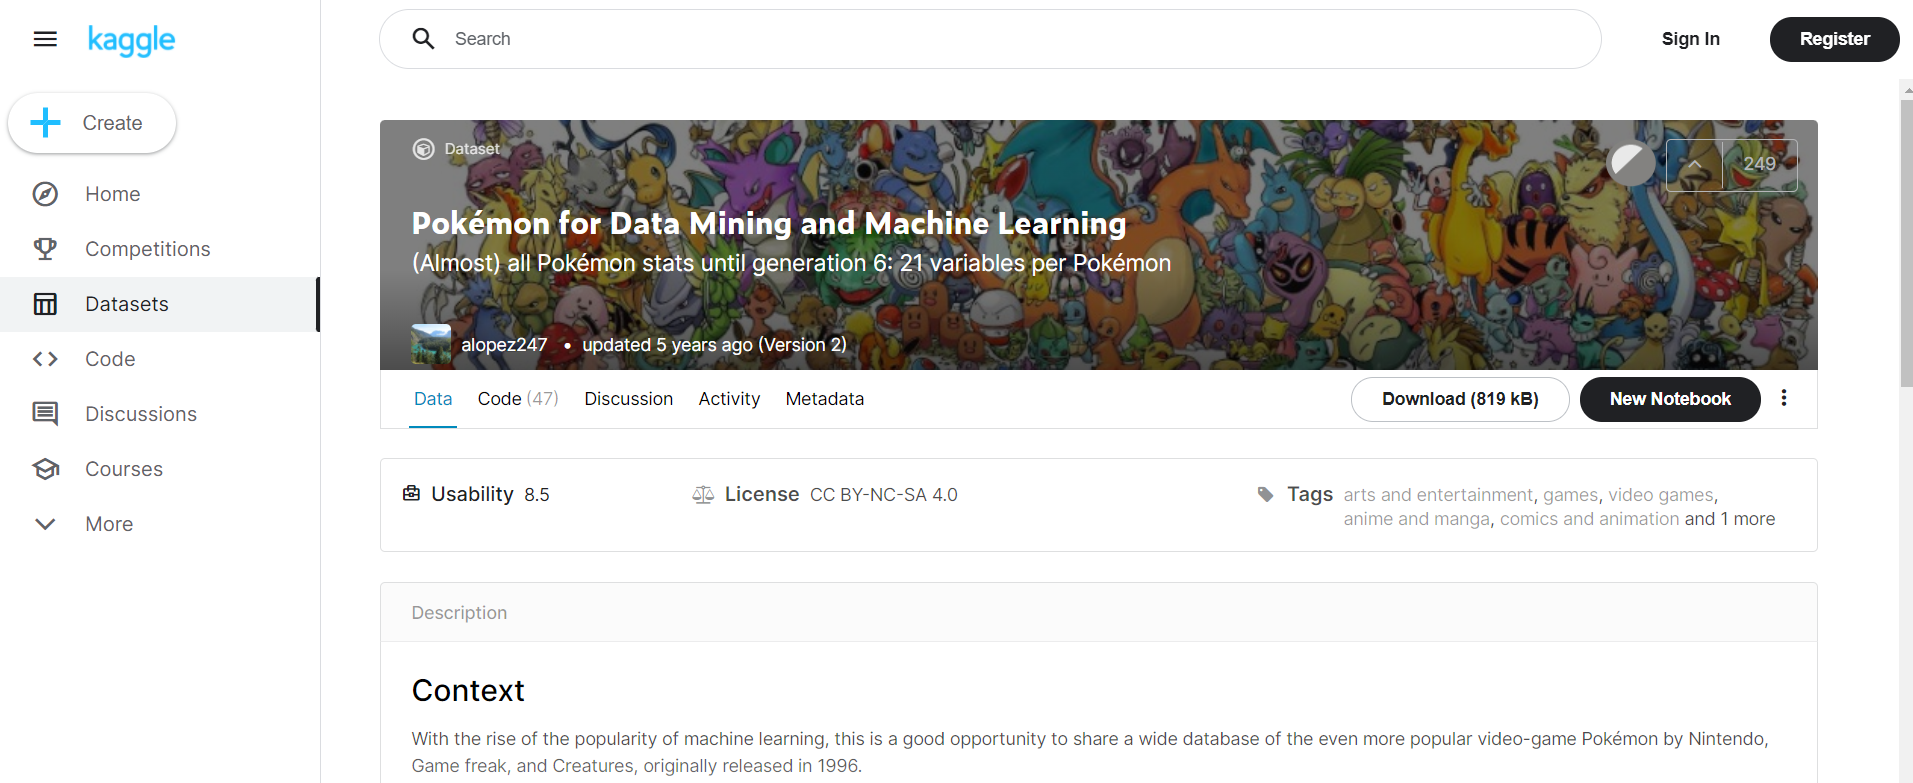

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
# https://www.kaggle.com/alopez247/pokemon
pokemon_data = pd.read_csv('Pokemon Data.csv')

In [3]:
poke = pd.DataFrame(pokemon_data)
poke.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [4]:
# checking out for null values.
poke.isnull().sum()

Number                0
Name                  0
Type_1                0
Type_2              371
Total                 0
HP                    0
Attack                0
Defense               0
Sp_Atk                0
Sp_Def                0
Speed                 0
Generation            0
isLegendary           0
Color                 0
hasGender             0
Pr_Male              77
Egg_Group_1           0
Egg_Group_2         530
hasMegaEvolution      0
Height_m              0
Weight_kg             0
Catch_Rate            0
Body_Style            0
dtype: int64

We have seen the null values in numbers now let's visualize them using heatmap

<AxesSubplot:>

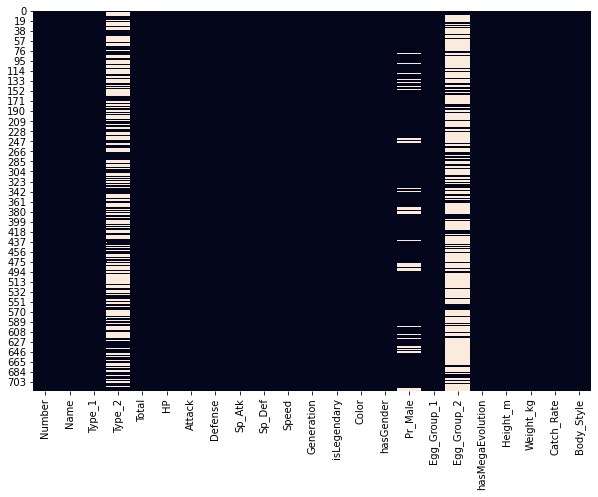

In [5]:
plt.figure(figsize=(10,7))
sns.heatmap(poke.isnull(), cbar=False)

Here it's clearly visible that Type_2, Pr_Male and Egg_Group_2 have quite a null values.

We have visualize the null values using the heatmap but in that kind of visualization we can't really get the count of the null values so for that we are using the distplot.

<Figure size 1440x1440 with 0 Axes>

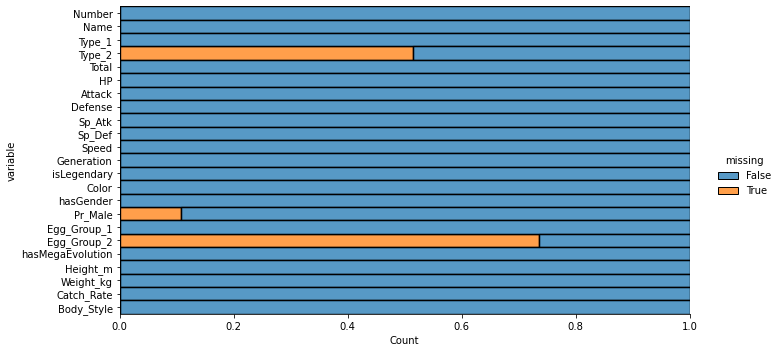

In [6]:
plt.figure(figsize=(20,20))
sns.displot(
    data=poke.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2
)

In [7]:
# from the shape it is clear the dataset is small, meaning we can simply remove the null values columns as filling them can
# make the dataset a little biased.
poke.shape

(721, 23)

In [8]:
# type_2, egg_group_2 and Pr_male have null values.
poke['Pr_Male'].value_counts()

0.500    458
0.875    101
0.000     23
0.250     22
0.750     19
1.000     19
0.125      2
Name: Pr_Male, dtype: int64

In [9]:
# Since Type_2 and Egg_group_2 columns have so many NULL values we will be removing those columns, you can impute them with other methods too,
# but for simplicity we wont do that here. We are only setting Pr_Male column since it had only 77 missing values.

poke['Pr_Male'].fillna(0.500, inplace=True)
poke['Pr_Male'].isnull().sum()

0

In [10]:
poke.tail()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
716,717,Yveltal,Dark,Flying,680,126,131,95,131,98,...,Red,False,0.5,Undiscovered,NaN,False,5.79,203.0,45,two_wings
717,718,Zygarde,Dragon,Ground,600,108,100,121,81,95,...,Green,False,0.5,Undiscovered,NaN,False,5.00,305.0,3,serpentine_body
718,719,Diancie,Rock,Fairy,600,50,100,150,100,150,...,Pink,False,0.5,Undiscovered,NaN,True,0.71,8.8,3,head_arms
719,720,Hoopa,Psychic,Ghost,600,80,110,60,150,130,...,Purple,False,0.5,Undiscovered,NaN,False,0.51,9.0,3,head_only
720,721,Volcanion,Fire,Water,600,80,110,120,130,90,...,Brown,False,0.5,Undiscovered,NaN,False,1.70,195.0,3,quadruped


In [11]:
# dropping columns

new_poke = poke.drop(['Type_2', 'Egg_Group_2'], axis=1)

In [12]:
# From the data understand each columns type and values.

new_poke.describe()
# (20, 20000) -> x -min/ max-min -> x = 300 -> 300-20/19980 -> a very small value

,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Pr_Male,Height_m,Weight_kg,Catch_Rate
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,361.00000,417.945908,68.380028,75.013870,70.808599,68.737864,69.291262,65.714286,3.323162,0.547677,1.144979,56.773370,100.246879
std,208.27906,109.663671,25.848272,28.984475,29.296558,28.788005,27.015860,27.277920,1.669873,0.189693,1.044369,89.095667,76.573513
min,1.00000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000,0.100000,0.100000,3.000000
25%,181.00000,320.000000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,2.000000,0.500000,0.610000,9.400000,45.000000
50%,361.00000,424.000000,65.000000,74.000000,65.000000,65.000000,65.000000,65.000000,3.000000,0.500000,0.990000,28.000000,65.000000
75%,541.00000,499.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,5.000000,0.500000,1.400000,61.000000,180.000000
max,721.00000,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,6.000000,1.000000,14.500000,950.000000,255.000000


<AxesSubplot:>

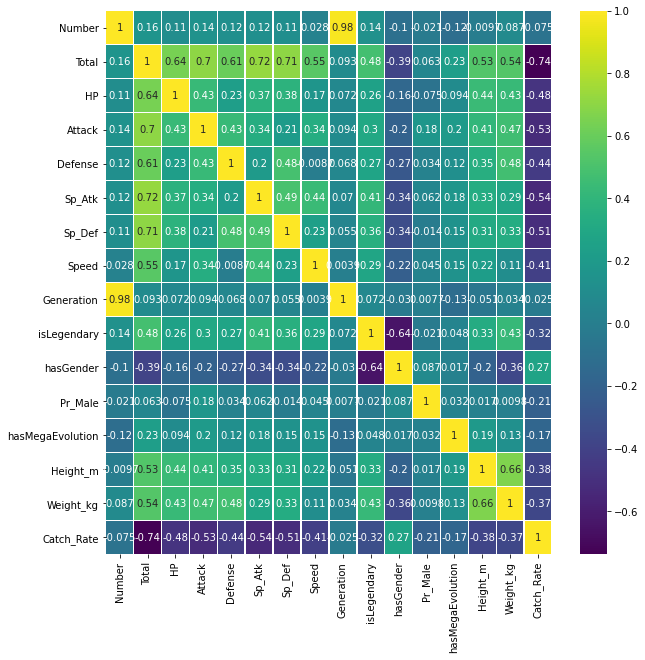

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(new_poke.corr(),annot=True,cmap='viridis',linewidths=.5)

In [14]:
# the above is a correlation graph which tells you how much is a feature correlated to another, sice high correlation means one of the two feature
# is not telling much to the model when predicting.
# Usually it is to be determined by you itself for the value of correlation that is high and is to be removed.

In [15]:
# From the above table it is clear that different features have different ranges of value, which creates complexity for model, so we tone them 
# down usually using StandardScalar() class which we will do later on.

In [16]:
# Now try to understand which columns are categorical, they are hidden mines of data and feature engineering is usually done on them.

new_poke['Type_1'].value_counts()

Water       105
Normal       93
Grass        66
Bug          63
Psychic      47
Fire         47
Rock         41
Electric     36
Ground       30
Poison       28
Dark         28
Fighting     25
Dragon       24
Ice          23
Ghost        23
Steel        22
Fairy        17
Flying        3
Name: Type_1, dtype: int64

In [17]:
new_poke['Generation'].value_counts()

5    156
1    151
3    135
4    107
2    100
6     72
Name: Generation, dtype: int64

### Visualising some categorical values

Here for visualising the categorical data I'm using the catplot() function of seaborn. well one can use the line plot scatter plot or box plot seperately too but here catplot brings up the unified version of using all the plots hence I preferred the catplot rather than using the seperate verson of each plots

Here for counting each type (6) categories of generations I'm using the count as the kind in the catplot to get the number of count of each generations column.

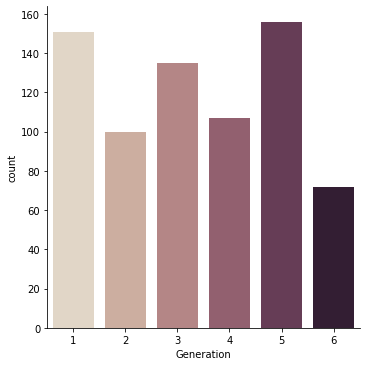

In [18]:
sns.catplot(x="Generation",kind="count",palette="ch:.25", data=poke)

Inference: In the above graph we can clearly see that 5th generation are the most in numbers.

Here we are using the default kind of catplot i.e. scatter plot to plot the Generation vs Defense graph where we will be able to figure out the relationship between the defense power of each generation of Pokeymon.

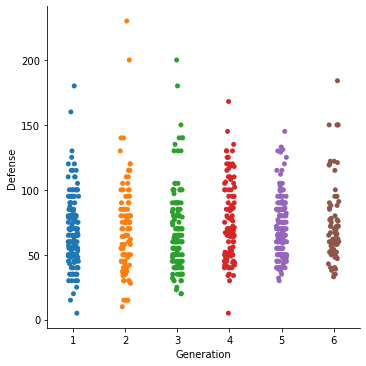

In [19]:
sns.catplot(x="Generation", y="Defense", data=poke)

Here we can see that only two pokeymons in generation 2 has the highest defense capability but we can't conclude that generation 2 has the highest defense capabilities as it is the outliers but in the graph it is evident that generation 6 and 4 has the highest defense capabilities.

Here we are using the Box plot because boxplot will help us to understand the variations in the large dataset in a better way also it will let us know about the outliers more clearly.

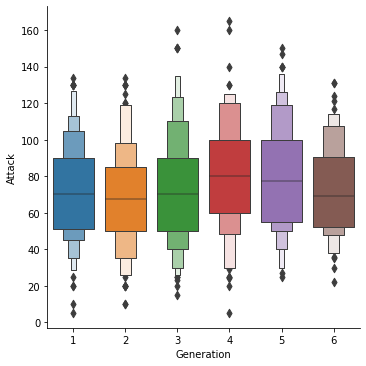

In [20]:
sns.catplot(x="Generation", y="Attack",kind="boxen", data=poke)

* Here in the above boxplot we can see that there are lot of outliers in the generation 4 and generation 1 when it comes to attacking capabilities.
* Also generation 4 has the highest median values of their attacking capabilities than all the other generations.

Now we are using bar kind via catplot which will let us know about the Attacking capabilities of different generations based on their gender. for example in generation 1 the attacking power of male pokeymons are higher than those of the female pokeymons of same generations but that generation also have the least attacking power than all the other generations

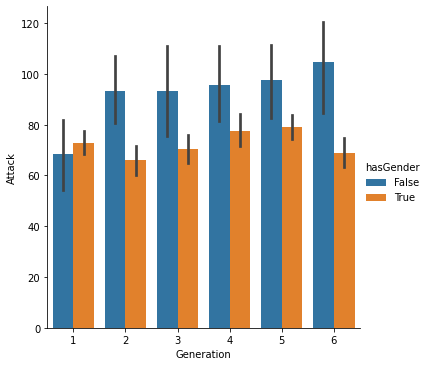

In [21]:
sns.catplot(x="Generation", y="Attack",kind='bar',hue='hasGender', data=poke)

From the above graph we can conclude that,
* In generation 1 only male pokeymon has more attacking power than the female pokeymon which is contradicting with other generations.
* Gneration 6 has the highest attacking power while the generation 1 has the lowest attacking power.

In [22]:
new_poke['Color'].value_counts()

Blue      134
Brown     110
Green      79
Red        75
Grey       69
Purple     65
Yellow     64
White      52
Pink       41
Black      32
Name: Color, dtype: int64

In [23]:
new_poke['Egg_Group_1'].value_counts()

Field           169
Monster          74
Water_1          74
Undiscovered     73
Bug              66
Mineral          46
Flying           44
Amorphous        41
Human-Like       37
Fairy            30
Grass            27
Water_2          15
Water_3          14
Dragon           10
Ditto             1
Name: Egg_Group_1, dtype: int64

In [24]:
new_poke['Body_Style'].value_counts()

bipedal_tailed      158
quadruped           135
bipedal_tailless    109
two_wings            63
head_arms            39
head_only            34
with_fins            31
insectoid            30
head_base            30
serpentine_body      29
four_wings           18
head_legs            17
multiple_bodies      15
several_limbs        13
Name: Body_Style, dtype: int64

In [25]:
# Let's also consider the number of values in our target column
new_poke['isLegendary'].value_counts()

False    675
True      46
Name: isLegendary, dtype: int64

In [26]:
# There are more categorical data, which I have not listed here, can you find those?
# Can you identify, why I have not listed them

In [27]:
# Feature Engineering

# creating new categories or actually merging categories so it is easy for to work with afterwards.
# Now this may seem uncomfortable to some but you will get it why I did it like that.

poke_type1 = new_poke.replace(['Water', 'Ice'], 'Water')
poke_type1 = poke_type1.replace(['Grass', 'Bug'], 'Grass')
poke_type1 = poke_type1.replace(['Ground', 'Rock'], 'Rock')
poke_type1 = poke_type1.replace(['Psychic', 'Dark', 'Ghost', 'Fairy'], 'Dark')
poke_type1 = poke_type1.replace(['Electric', 'Steel'], 'Electric')

poke_type1['Type_1'].value_counts()

Grass       129
Water       128
Dark        115
Normal       93
Rock         71
Electric     58
Fire         47
Poison       28
Fighting     25
Dragon       24
Flying        3
Name: Type_1, dtype: int64

In [28]:
poke_type1.head()

,Number,Name,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,...,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,...,False,Green,True,0.875,Monster,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,...,False,Green,True,0.875,Monster,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,525,80,82,83,100,100,80,...,False,Green,True,0.875,Monster,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,309,39,52,43,60,50,65,...,False,Red,True,0.875,Monster,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,405,58,64,58,80,65,80,...,False,Red,True,0.875,Monster,False,1.09,19.0,45,bipedal_tailed


In [29]:
ref1 = dict(poke_type1['Body_Style'].value_counts())

poke_type1['Body_Style_new'] = poke_type1['Body_Style'].map(ref1)

In [30]:
# You may be wondering what I did, I took the value counts of each body type and replced the body type with the numbers, see below
poke_type1['Body_Style_new'].head()

0    135
1    135
2    135
3    158
4    158
Name: Body_Style_new, dtype: int64

In [31]:
poke_type1['Body_Style'].head()

0         quadruped
1         quadruped
2         quadruped
3    bipedal_tailed
4    bipedal_tailed
Name: Body_Style, dtype: object

In [32]:
# encoding data - features like Type_1 and Color

In [33]:
types_poke = pd.get_dummies(poke_type1['Type_1'])
color_poke = pd.get_dummies(poke_type1['Color'])

X = pd.concat([poke_type1, types_poke], axis=1)
X = pd.concat([X, color_poke], axis=1)

X.head()

,Number,Name,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,...,Black,Blue,Brown,Green,Grey,Pink,Purple,Red,White,Yellow
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,...,0,0,0,1,0,0,0,0,0,0
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,...,0,0,0,1,0,0,0,0,0,0
2,3,Venusaur,Grass,525,80,82,83,100,100,80,...,0,0,0,1,0,0,0,0,0,0
3,4,Charmander,Fire,309,39,52,43,60,50,65,...,0,0,0,0,0,0,0,1,0,0
4,5,Charmeleon,Fire,405,58,64,58,80,65,80,...,0,0,0,0,0,0,0,1,0,0


In [34]:
# Now we have build some features and extracted some feature data, whats left is to remove redundant features
X.columns

Index(['Number', 'Name', 'Type_1', 'Total', 'HP', 'Attack', 'Defense',
       'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary', 'Color',
       'hasGender', 'Pr_Male', 'Egg_Group_1', 'hasMegaEvolution', 'Height_m',
       'Weight_kg', 'Catch_Rate', 'Body_Style', 'Body_Style_new', 'Dark',
       'Dragon', 'Electric', 'Fighting', 'Fire', 'Flying', 'Grass', 'Normal',
       'Poison', 'Rock', 'Water', 'Black', 'Blue', 'Brown', 'Green', 'Grey',
       'Pink', 'Purple', 'Red', 'White', 'Yellow'],
      dtype='object')

In [35]:
X_ = X.drop(['Number', 'Name', 'Type_1', 'Color', 'Egg_Group_1'], axis = 1)
X_.shape

(721, 38)

In [36]:
X.shape

(721, 43)

In [37]:
# creating and training our model

In [38]:
# Lastly we define our target variable and set it into a variable called y
y = X_['isLegendary']
X_final = X_.drop(['isLegendary', 'Body_Style'], axis = 1)

In [54]:
print(y.head())

0    False
1    False
2    False
3    False
4    False
Name: isLegendary, dtype: bool


In [39]:
X_final.columns

Index(['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed',
       'Generation', 'hasGender', 'Pr_Male', 'hasMegaEvolution', 'Height_m',
       'Weight_kg', 'Catch_Rate', 'Body_Style_new', 'Dark', 'Dragon',
       'Electric', 'Fighting', 'Fire', 'Flying', 'Grass', 'Normal', 'Poison',
       'Rock', 'Water', 'Black', 'Blue', 'Brown', 'Green', 'Grey', 'Pink',
       'Purple', 'Red', 'White', 'Yellow'],
      dtype='object')

In [40]:
X_final.head()

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,hasGender,Pr_Male,...,Black,Blue,Brown,Green,Grey,Pink,Purple,Red,White,Yellow
0,318,45,49,49,65,65,45,1,True,0.875,...,0,0,0,1,0,0,0,0,0,0
1,405,60,62,63,80,80,60,1,True,0.875,...,0,0,0,1,0,0,0,0,0,0
2,525,80,82,83,100,100,80,1,True,0.875,...,0,0,0,1,0,0,0,0,0,0
3,309,39,52,43,60,50,65,1,True,0.875,...,0,0,0,0,0,0,0,1,0,0
4,405,58,64,58,80,65,80,1,True,0.875,...,0,0,0,0,0,0,0,1,0,0


In [41]:
# splitting the dataset into training and testing dataset
Xtrain, Xtest, ytrain, ytest = train_test_split(X_final, y, test_size=0.2)

In [42]:
# using random forest classifier for training our model
random_model = RandomForestClassifier(n_estimators=500, random_state = 42)

In [43]:
#Fit
model_final = random_model.fit(Xtrain, ytrain)

y_pred = model_final.predict(Xtest)

#Checking the accuracy
random_model_accuracy = round(model_final.score(Xtrain, ytrain)*100,2)
print(round(random_model_accuracy, 2), '%')

100.0 %


In [44]:
random_model_accuracy1 = round(random_model.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy1, 2), '%')

99.31 %


In [45]:
print(type(ytest))
Ytest = np.array(ytest)

<class 'pandas.core.series.Series'>


In [46]:
type(y_pred)

numpy.ndarray

In [47]:
count = 0
for i in range(len(ytest)):
    if Ytest[i] == y_pred[i]:
        count = count + 1

print((count/len(ytest))*100)

99.3103448275862


In [48]:
# save the model to disk
import pickle
filename = 'pokemon_model.pickle'
pickle.dump(model_final, open(filename, 'wb'))

In [49]:
# load the model from disk
filename = 'pokemon_model.pickle'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(Xtest, ytest)

In [50]:
result*100

99.3103448275862